# Part 1: Representing a Polynomial

Polynomials are function of the following format

$$p(x) = a_0 + a_1 x ^ 1 + a_2 x ^ 2 + ... + a_n x ^ n,$$

where, $[a_0, a_1, \cdots a_n]$ are called coefficients and $n$ (called the degree or order) is a non-negative integer.


This can also be written as:

$$y = f(x) = a_0 x^0 + a_1 x ^ 1 + a_2 x ^ 2 + ... + a_n x ^ n.$$

**Example**
$$ y = 1 + 2x^2 + 5x^4 $$ is a polynomial of order 4 ($ = n$) with $n+1$ coeffecients $a_0 = 1, a_1 = 0, a_2 = 2, a_3 = 0, a_4 = 5$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Using List

In [ ]:
coeff = [1, 0, 2, 0, 5] # coefficients of the polynomial
n = len(coeff) - 1 # degree. Remember: number of coeff = degree + 1

x = 6.0
p_x = 0.0

for i in range(n+1):
  p_x += coeff[i] * (x ** i)

print(p_x)


x_arr = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
p_x_arr = []

p_x=0
for i in range(len(x_arr)):
  for j in range(n+1):
    p_x += coeff[j] * (x_arr[i] ** j)
  p_x_arr.append(p_x)
  p_x=0

print(p_x_arr)

6553.0
[8.0, 89.0, 424.0, 1313.0, 3176.0, 6553.0]


Using Class

In [ ]:
class Polynomial:
  def __init__(self, coeff):
    self.coeff = coeff
    self.degree = len(coeff) - 1

  def __call__(self, x_arr):
    self.x_arr=x_arr
    p_x_arr = []
    p_x=0
    for i in range(len(x_arr)):
      for j in range(len(self.coeff)):
        p_x += self.coeff[j] * (x_arr[i] ** j)
      p_x_arr.append((p_x))
      p_x=0
    print(p_x_arr)
    return p_x_arr

  def __repr__(self):
    str_ret = f'Polynomial of degree {self.degree}\np(x) = '
    for i in range(len(x_arr)):
        a_val = self.coeff[i]
        if i != 0:
            if a_val >= 0:
                str_ret += f'+ {a_val}x^{i} '
            else:
                str_ret += f'- {-a_val}x^{i} '
        else:
            str_ret += f'{a_val}x^{i} '

    return str_ret

  def get_degree(self):
    return self.degree

  def get_coeffs(self):
    return self.coeffs

In [ ]:
x_arr = np.array([1, 2, 3, 4, 5])

coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])
p = Polynomial(coeff)
print(p)

results = [8, 89, 424, 1313, 3176]
test = p(x_arr)

np.testing.assert_array_equal(results, test)

Polynomial of degree 4
p(x) = 1.0x^0 + 0.0x^1 + 2.0x^2 + 0.0x^3 + 5.0x^4 
[8.0, 89.0, 424.0, 1313.0, 3176.0]


In [ ]:
# an example to see if our implementation works
coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])
p = Polynomial(coeff)
print(p)  # check if printable
x_arr = np.array([1, 2, 3, 4, 5])
print()
print(f"p({x_arr}) =", p(x_arr)) # check if the object is callable
# should print p([1 2 3 4 5]) =  [   8.   89.  424. 1313. 3176.]

Polynomial of degree 4
p(x) = 1.0x^0 + 0.0x^1 + 2.0x^2 + 0.0x^3 + 5.0x^4 

[8.0, 89.0, 424.0, 1313.0, 3176.0]
p([1 2 3 4 5]) = [8.0, 89.0, 424.0, 1313.0, 3176.0]


# Part 2: Polynomial Interpolation (Matrix Method)

If we have  $n+1$ nodes, that is,  $\{(x_0, y_0), (x_1, y_1), (x_2, y_2), (x_{n}, y_{n})\}$ that satisfies a polynomial of order $n$, it can be written as:

\begin{align}
&a_0 + a_1  x_0 + a_2  x_0^2 + \cdots a_n  x_0^n = y_0\\
&a_0 + a_1  x_1 + a_2  x_1^2 + \cdots a_n  x_1^n = y_1\\
&a_0 + a_1  x_2 + a_2  x_2^2 + \cdots a_n  x_2^n = y_2\\
&\cdots\\
&a_0 + a_1  x_{n-1} + a_2  x_{n}^2 + \cdots + a_n  x_{n}^n = y_{n}\\
\end{align}

Here, $p(x) = a_0 + a_1x^1 + a_2x^2 + \cdots a_nx^n$ is called the fitted polynomial of the given data points (nodes). Using this polynomial to find the $y_k$ corresponding to an $x_k$ with the range of the given nodes is called polynomial interpolation.

In matrix form, the equations can be written as  $$\mathbf{Xa = y},$$

where $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & x_0^2 & \cdots & x_0^n\\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^n\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x_n^0 & x_{n}^1 & x_n^2 & \cdots & x_n^n\\
\end{bmatrix}

$\mathbf{a} = $
\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}

and $\mathbf{y} = $
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}

From this, we can solve for $\mathbf{a}$ using
$$\mathbf{a = X^{-1}y}.$$



Vandermonde Matrix

In [ ]:
def get_poly(data_x, data_y):
    n_nodes = len(data_x)
    X = np.zeros((n_nodes, n_nodes))

    for i in range(n_nodes):
        for j in range(n_nodes):
            X[i][j] = data_x[i] ** j
    print(X)
    X_inv = np.linalg.pinv(X)
    a = np.dot(X_inv, data_y)
    p = Polynomial(a)

    return p

In [ ]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])   # (-3, -80), (-2, -13)......
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = get_poly(data_x, data_y)

[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]


[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]
[-80.00000000000054, -74.6099768905694, -69.36169491556362, -64.26436346250605, -59.326221339679606, -54.554564168211584, -49.955771774158755, -45.53533558059178, -41.297885999680005, -37.24721982477618, -33.386327622501184, -29.717421124828654, -26.241960621169802, -22.960682350457994, -19.87362589323353, -16.98016156372833, -14.27901780195068, -11.768308565769843, -9.445560723000838, -7.307741443489137, -5.3512855911953645, -3.5721231162799603, -1.9657064471879364, -0.527037882733588, 0.7493030158148648, 1.8691320326505192, 2.838632905343095, 3.6643299327542396, 4.3530605829528195, 4.911948101130213, 5.348374117515607, 5.6699512552913, 5.884495738507984, 6.000000000000055, 6.02460528930089, 5.966574280558162, 5.834263680449121, 5.6360968360959, 5.380536

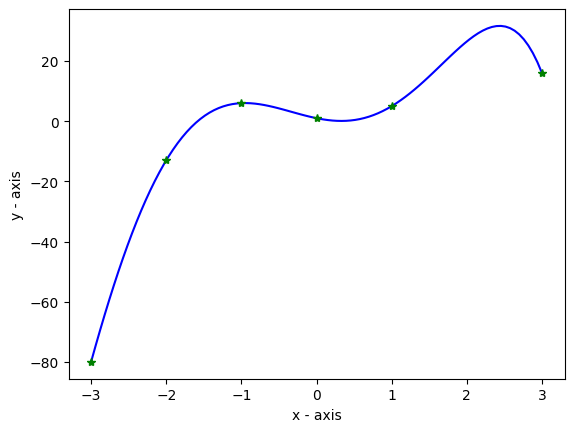

In [ ]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = get_poly(data_x, data_y)

x_arr = np.linspace(-3, 3, 100)
y_interp = p(x_arr)


plt.plot(x_arr, y_interp, 'b')
plt.plot(data_x, data_y, 'g*')
plt.xlabel('x - axis')
plt.ylabel('y - axis')


plt.show()

###Task 1
Suppose, you have three nodes (-0.75, 1.87), (0.5, 2.20), (1.5, 2.44). Using Vandermonde Matrix method, print out the value of the interpolating polynomial at x = 3.
You have to solve the given problem using above implemented **get_poly()** method.

### Task 2

You have been given three separate set of nodes,

1.   Set 1:  (-0.45, 1.02), (0.39, 1.47), (1.33, 2.02)

2.   Set 2:  (0.5, 1.24), (-0.39, -1.46)


(a)Find two separate interpolating polynomial equations using the given set of nodes.

(b)Print the degrees and the coefficients of each of the polynomials separately.

(c)Calculate and print the absolute average value of the coefficients for each of the polynomials separately.

(d)Finally use the given values of x to find their corresponding y values for the polynomial with the highest average of coefficients. **[Hint: You can take decision based on the average value of the coefficients]**

**Given x value list = [-0.45, 0.51, 1.23, 1.49, 1.67, 2.05, 2.77]**